# Numpy

## Comparaison entre boucles for et numpy

Le code ci-dessous propose une façon basique de créer un tableau multi-dimensionnel puis d'effectuer une opération dessus. Ensuite, on utilise la librairie numpy pour faire la même chose.

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Pour comparer une méthode de calcul « standard » avec des boucles for à son équivalent sous numpy
"""


import timeit #librairie pour chronométrer un morceau de code
import math
import numpy as np

def basic_create(N=100):
    """
    Implémentation de la création et du calcul du sinus des n premiers entiers 
    pour un tableau bidimensionnel
    - N (int) : taille du carré
    retourne une double liste contenant toujours le sinus des N premiers entiers
    """
    carre = []
    for i in range(N):
        inner_list = []
        carre.append(inner_list)
        for j in range(N):
            inner_list.append(j)
    return carre

def basic_sinus(carre):
    """
    Calcul du sinus du carre
    - carre : double liste avec des entiers
    retourne :
    - sinus des éléments
    """
    carre_sin = []
    for i in carre:
        inner_list = []
        carre_sin.append(inner_list)
        for j in i:
            inner_list.append(math.sin(j))
    return carre_sin

def basic_function(N=100):
    """
    Fonction qui créé un carré puis calcul le sinus dans un deuxième temps
    """
    carre = basic_create(N=N)
    carre_sin = basic_sinus(carre)
    return carre_sin

def numpy_function_1(N=100):
    carre = np.repeat(np.arange(N)[:, np.newaxis], N, axis=1)
    carre_sin = np.sin(carre)
    return carre_sin

def numpy_function_2(N=100):
    carre = np.dstack([np.arange(N)]*N)
    carre_sin = np.sin(carre)
    return carre_sin

def numpy_function_3(N=100):
    carre = np.arange(N)*np.ones((N,N))
    carre_sin = np.sin(carre)
    return carre_sin.T

if __name__ == "__main__":
    """
    # exécution des différentes fonctions pour voir qu'elles donnent toutes le même résultat
    print(basic_function(N=5))
    print(numpy_function_1(N=5))
    print(numpy_function_2(N=5))
    print(numpy_function_3(N=5))
    """    
    repeat = 1000
    #On exécute `repeat` fois chaque fonction et on mesure le temps écoulé
    print("Temps de référence pour la fonction basique {}".format(timeit.timeit(basic_function,number=repeat)))
    print("Temps avec numpy première version {}".format(timeit.timeit(numpy_function_1,number=repeat)))
    print("Temps avec numpy deuxième version {}".format(timeit.timeit(numpy_function_2,number=repeat)))
    print("Temps avec numpy troisième version {}".format(timeit.timeit(numpy_function_3,number=repeat)))

Temps de référence pour la fonction basique 2.0840815720148385
Temps avec numpy première version 0.1711125110159628
Temps avec numpy deuxième version 0.26911615300923586
Temps avec numpy troisième version 0.15409591398201883


On peut voir que l'implémentation basique est :
- environ **12 fois plus lente** (alors que l'exemple est très simple) 
- demande **14** lignes de programmation là ou avec numpy il n'en faut que **3**
- n'est **pas du tout flexible** : le calcul du sinus élément par élément fait explicitement appel à deux boucles for et ne marcherait donc pas pour un tableau tridimensionnel 


## Caractéristiques d'un ndarray

In [2]:
data = np.arange(60)
#Pour changer le type des variables
#data = np.arange(60,dtype='float')
data = data.reshape((3,4,5))#,order='F')
print(data)
print('Dimension de data : {}'.format(data.ndim))
print('Shape de data : {}'.format(data.shape))
print('Taille de data : {}'.format(data.size))
print('Types des éléments de data : {}'.format(data.dtype))
#print(data[])

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]
  [30 31 32 33 34]
  [35 36 37 38 39]]

 [[40 41 42 43 44]
  [45 46 47 48 49]
  [50 51 52 53 54]
  [55 56 57 58 59]]]
Dimension de data : 3
Shape de data : (3, 4, 5)
Taille de data : 60
Types des éléments de data : int64


## Quelques méthodes de création d'un ndarray

https://numpy.org/doc/stable/reference/routines.array-creation.html

### np.array et np.asarray

In [3]:
data1 = np.array([[[0,1,2],[3,4,5]],[[6,7,8],[9,10,11]]])
print(data1)
print(data1.shape)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
(2, 2, 3)


In [4]:
liste = [1,2,3.,5.]
print(type(liste),liste)
data6 = np.asarray(liste)
print(type(data6),data6)

<class 'list'> [1, 2, 3.0, 5.0]
<class 'numpy.ndarray'> [1. 2. 3. 5.]


### Utilisation de empty, zeros, ones, full

In [5]:
print('empty')
data2 = np.empty((2,3,4))
print(data2)
print(data2.dtype)

print('\nzeros')
data3 = np.zeros((2,3,5))
print(data3)
print(data3.dtype)

print('\nones')
data4 = np.ones((2,3,6))
print(data4)
print(data4.dtype)
#exemple avec des nombres complexes
print('\nfull')
data5 = np.full((2,3,7),1+1j*3)
print(data5)
print(data5.dtype)

empty
[[[1.70911106e-316 0.00000000e+000 0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]]

 [[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]]]
float64

zeros
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]
float64

ones
[[[1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1.]]]
float64

full
[[[1.+3.j 1.+3.j 1.+3.j 1.+3.j 1.+3.j 1.+3.j 1.+3.j]
  [1.+3.j 1.+3.j 1.+3.j 1.+3.j 1.+3.j 1.+3.j 1.+3.j]
  [1.+3.j 1.+3.j 1.+3.j 1.+3.j 1.+3.j 1.+3.j 1.+3.j]]

 [[1.+3.j 1.+3.j 1.+3.j 1.+3.j 1.+3.j 1.+3.j 1.+3.j]
  [1.+3.j 1.+3.j 1.+3.j 1.+3.j 1.+3.j 1.+3.j 1.+3.j]
  [1.+3.j 1.+3.j 1

Utilisation de la version en `_like` pour copier le shape d'un autre ndarray.

In [6]:
z_like = np.zeros_like(data5)
print(z_like.shape)

(2, 3, 7)


Pour les fonctions de création de nombres espacés attention à la différence entre nombre d'intervalles et nombre de points. Ainsi, pour decouper le segment [0,1] en 10 intervalles, il faut .. 11 valeurs. 

Pour logspace, il faut indiquer comme borne le logarithme et pas la valeur.

In [7]:
print('arange')
data9 = np.arange(3,25,2)
print(data9)

print('\nlinspace')
data7,dx = np.linspace(0,1,11,retstep=True)
print(data7)
print('Les points sont espacés tous les {}\n'.format(dx))

print('\nlogspace')
data8 = np.logspace(0,7,8)
print(data8)

print('\ngeomspace')
data8 = np.geomspace(1,1e7,8)
print(data8)

arange
[ 3  5  7  9 11 13 15 17 19 21 23]

linspace
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Les points sont espacés tous les 0.1


logspace
[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07]

geomspace
[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07]


### Création d'une grille multidimensionnelle avec np.meshgrid
meshgrid permet de créer facilement des coordonnées de points ordonnées. Il est facilement possible de faire des grilles non régulières (en utilisant np.geomspace au lieu de np.linspace par exemple)

In [54]:
#On créé des points selon une dimension
x = np.linspace(1,10,2)
y = np.linspace(-2,-1,3)
z = np.linspace(20,30,4)
#à partir de ces points à une dimension, on créé une grille de points en deux dimensions
xx,yy,zz = np.meshgrid(x,y,z,indexing='ij')

"""
On a dans xx les 66 coordonnées x_i et dans yy les 66 coordonnées y_i des
point (x_i,y_i)
"""
#print(xx)
#print(yy)
print(xx.shape)
print(yy.shape)
print(zz.shape)

(2, 3, 4)
(2, 3, 4)
(2, 3, 4)


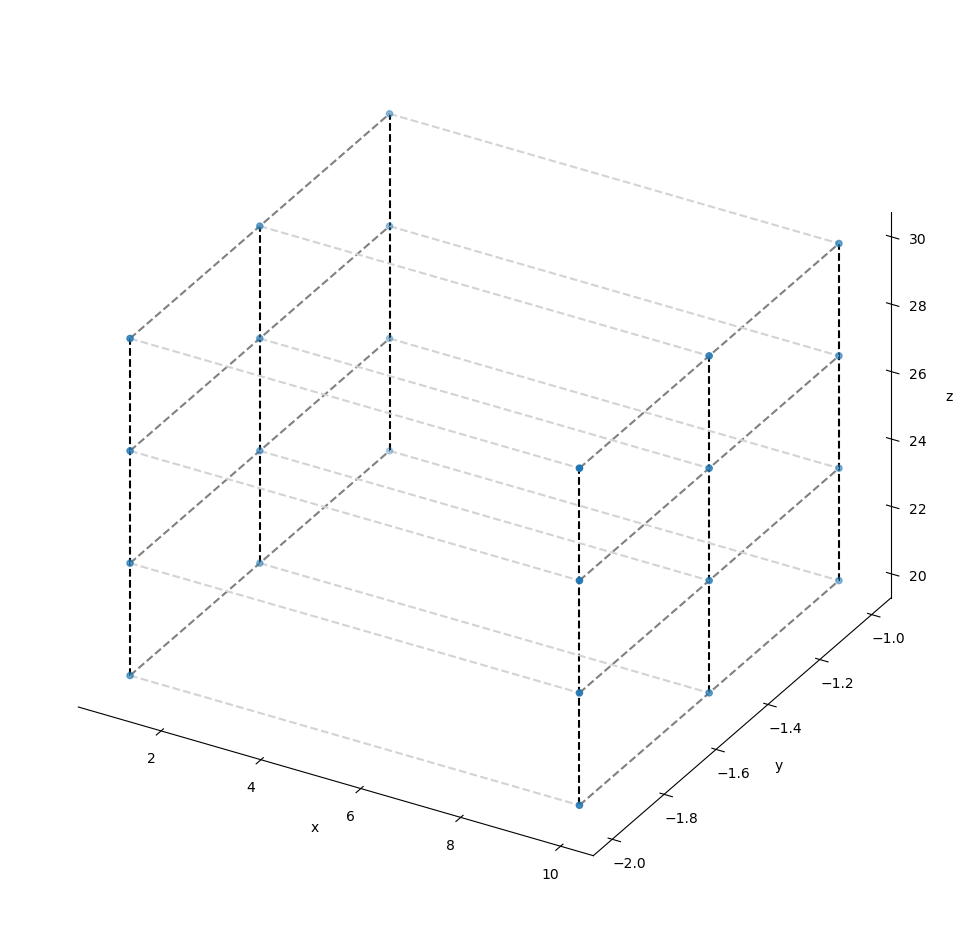

In [55]:
"""
Visualisation graphique de la grille de coordonnées tridimensionnelle ainsi créée
"""

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d', proj_type='ortho')

ax.scatter(xx,yy,zz, cmap='viridis')
#Tracé des lignes verticales selon Oz
for ix in x:
    for iy in y:
         ax.plot(ix*np.ones_like(z),iy*np.ones_like(z),z,ls='--',color='black')
#Tracé des lignes horizontales selon Oy
for ix in x:
    for iz in z:
         ax.plot(ix*np.ones_like(y),y,iz*np.ones_like(y),ls='--',color='grey')  
#Tracé des lignes horizontales selon Ox          
for iy in y:
    for iz in z:
         ax.plot(x,iy*np.ones_like(x),iz*np.ones_like(x),ls='--',color='lightgrey') 
#Ajout des légendes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#code pour enlever le fond.
# pour enlever les panneaux
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# pour enlever les lignes de guidage
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
plt.show()